In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# read in the data
df = pd.read_csv('/Users/yiyangbi/Desktop/movies 2.csv')

In [99]:
# display part of the data beforehand

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [100]:
# check if any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [101]:
# remove any NA values as it will interfere with the analysis later on
df = df.dropna()

# check again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [102]:
# check datatypes and get the structure of the dataset

print(df.dtypes)
df.head()

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [103]:
# in the 'released' column, I found the form is not correct(the date is followed by name of the country)
# Extract release date and country using regex
print(df.columns)
df[['release_date', 'release_country']] = df['released'].str.extract(r'^(.*?)\s*\((.*?)\)$')

# Drop the original "released" column
df.drop(columns=['released'], inplace=True)
df.head()

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [104]:
# change the data type of some variables
df['released_date'] = pd.to_datetime(df['release_date'])

# check the oldest and the newest movies from the data source
min_date = df['released_date'].min()
print(min_date)
max_date = df['released_date'].max()
print(max_date)

# change data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

1980-02-01 00:00:00
2020-09-03 00:00:00


In [109]:
# sort the movies dataset by gross
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
# Let's set it so we can see all of the set by scrolling if we wish.
##pd.set_option('display.max_rows', None)

In [110]:
# drop duplicate data
df.drop_duplicates()
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,released_date
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",United States,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",United States,2019-04-26
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",United States,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",United States,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",United States,2018-04-27


<AxesSubplot:>

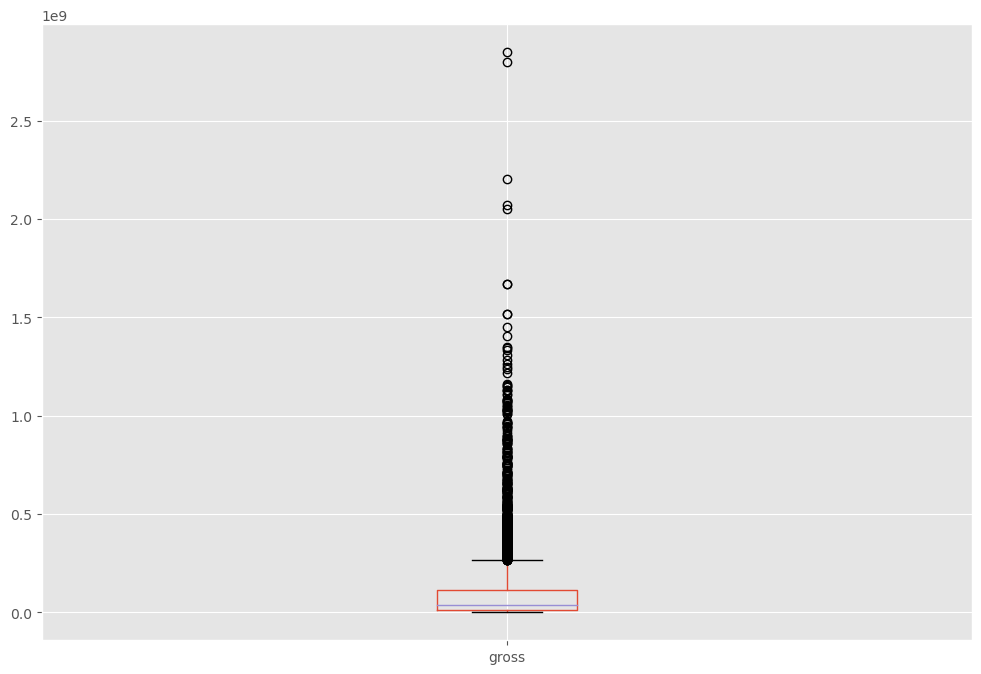

In [107]:
# check is there any outlier

df.boxplot(column=['gross'])

Hypothesis
(1) Budget and Gross will positively correlate as it would be thought that the more is spent on a film, the great cinematic experience and thus the greater return in revenue.

(2) The Company will have a high correlation with the amount of budget; this is my thoughts as bigger companies such as Warner Bros etc would generally have more budget to play with than smaller companies.

<function matplotlib.pyplot.show(close=None, block=None)>

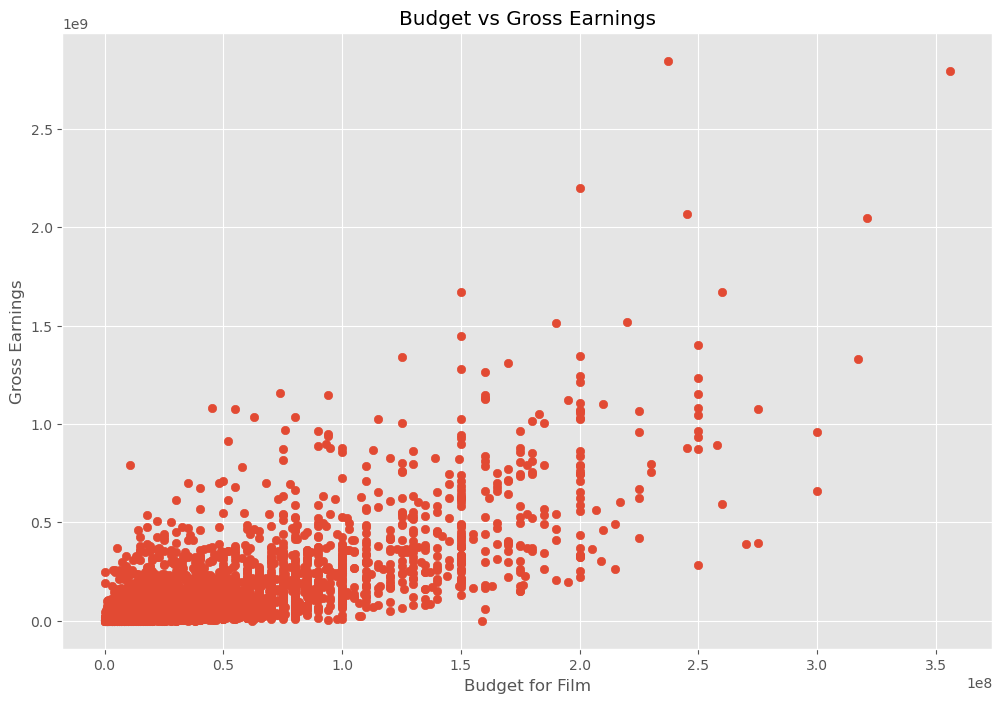

In [84]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show

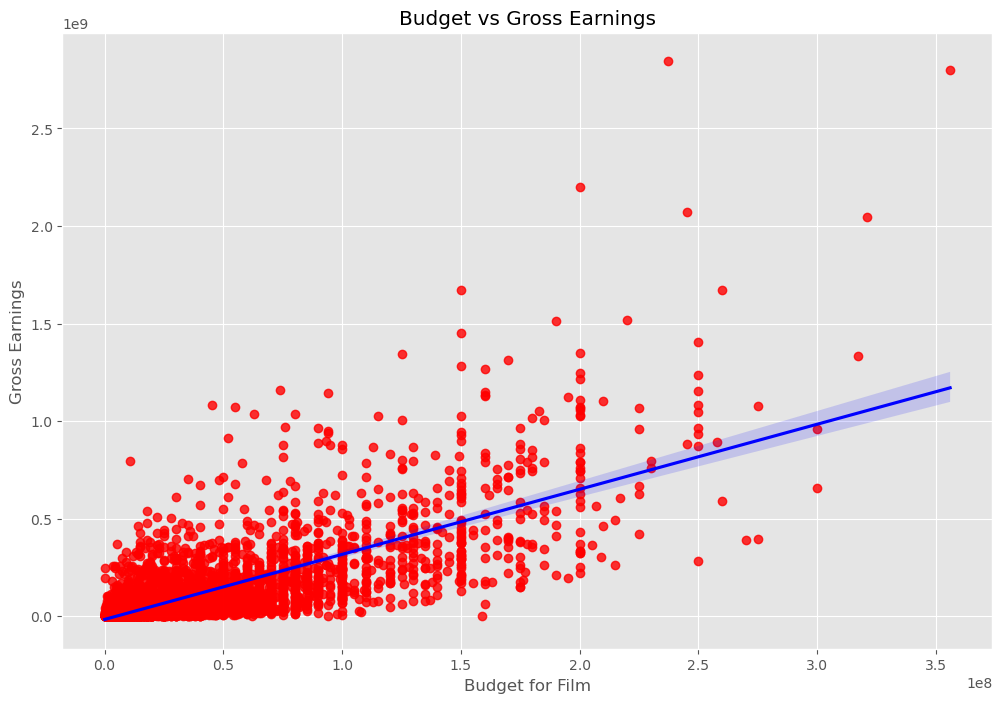

In [85]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show

# Save the plot as an image file
plt.savefig('chart_budget_gross.png')

In [86]:
# check for the mathmatical output of correlation against all numerical values in our data using the pearson method
# determine the correlation

df.corr(method='pearson') 
#pearson, kendall, spearman correlation are the three methods, so each will provide a slightly different result.

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


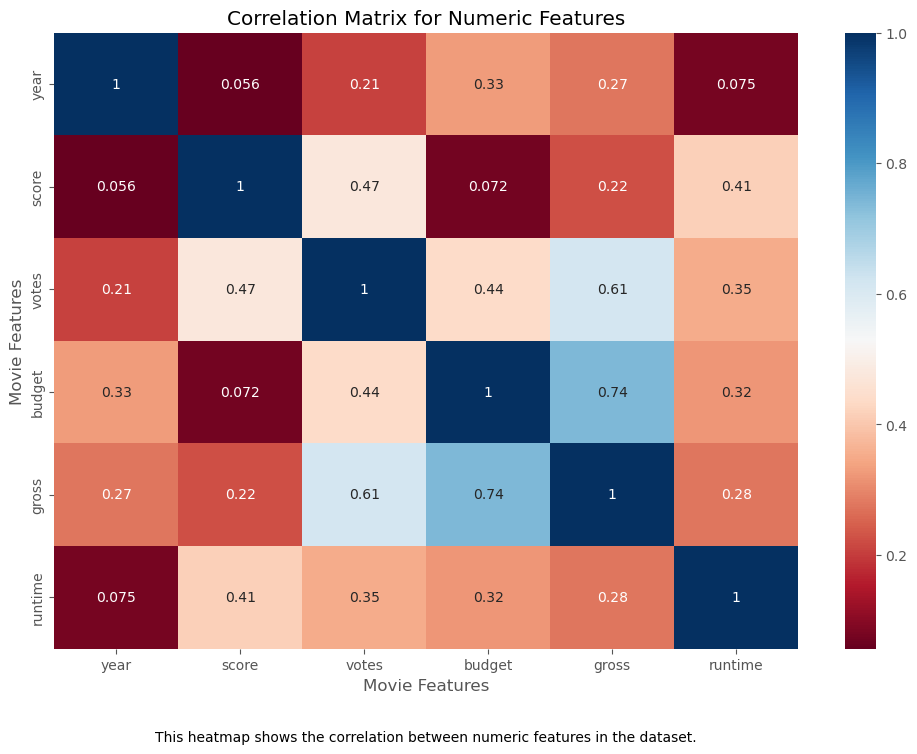

<Figure size 1200x800 with 0 Axes>

In [89]:
# heatmap
cor_matrix = df.corr(method='pearson')

sns.cor_matrix = df.corr(method='pearson')

sns.heatmap(cor_matrix, annot=True, cmap='RdBu') # Use 'RdBu_r' for reverse color scale, use 'RdYlGn' for red, yellow, green

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
caption = "This heatmap shows the correlation between numeric features in the dataset."
plt.annotate(caption, xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)

plt.show()

# save it
plt.savefig('cor_heatmap_1.png', bbox_inches='tight')

Another hypothesis was that the Company itself would correlate to the budget, but Company is not a numeric so cannot be included in the calculation in this state. Let's apply numeric values to everything that presents as an object, but save it as a separate data frame so to protect the original.

In [91]:
# apply numeric value to copied dataframe

df_numeric = df.copy()

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes
        
df_numeric.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,released_date
5445,386,5,0,2009,7.8,1100000.0,785,1263,1534,47,237000000,2.847246e+09,1382,162.0,496,47,2009-12-18
7445,388,5,0,2019,8.4,903000.0,105,513,1470,47,356000000,2.797501e+09,983,181.0,124,47,2019-04-26
3045,4909,5,6,1997,7.8,1100000.0,785,1263,1073,47,200000000,2.201647e+09,1382,194.0,502,47,1997-12-19
6663,3643,5,0,2015,7.8,876000.0,768,1806,356,47,245000000,2.069522e+09,945,138.0,498,47,2015-12-18
7244,389,5,0,2018,8.4,897000.0,105,513,1470,47,321000000,2.048360e+09,983,149.0,132,47,2018-04-27


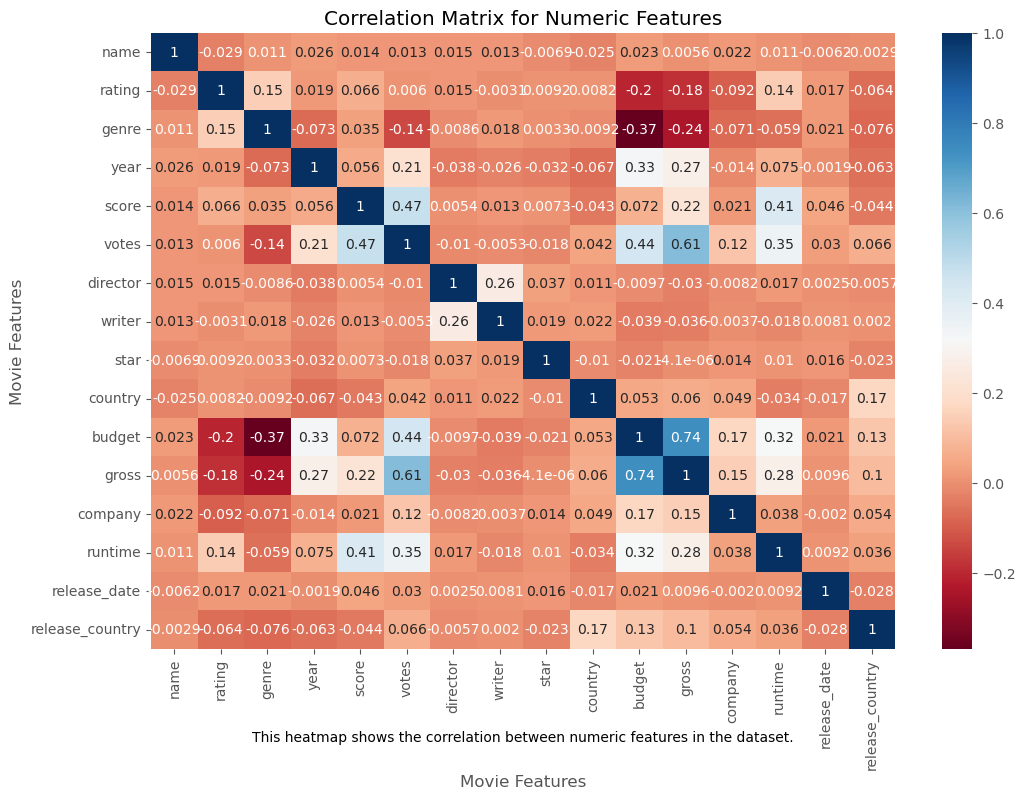

In [92]:
# Calculate the correlation with the new numeric values included
cor_numeric = df_numeric.corr(method='pearson')

# plot a heatmap
sns.heatmap(cor_numeric, annot=True, cmap='RdBu') # Use 'RdBu_r' for reverse color scale, use 'RdYlGn' for red, yellow, green

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
caption = "This heatmap shows the correlation between numeric features in the dataset."
plt.annotate(caption, xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)

plt.show()

plot another heat map with the new information from the copied data frame.

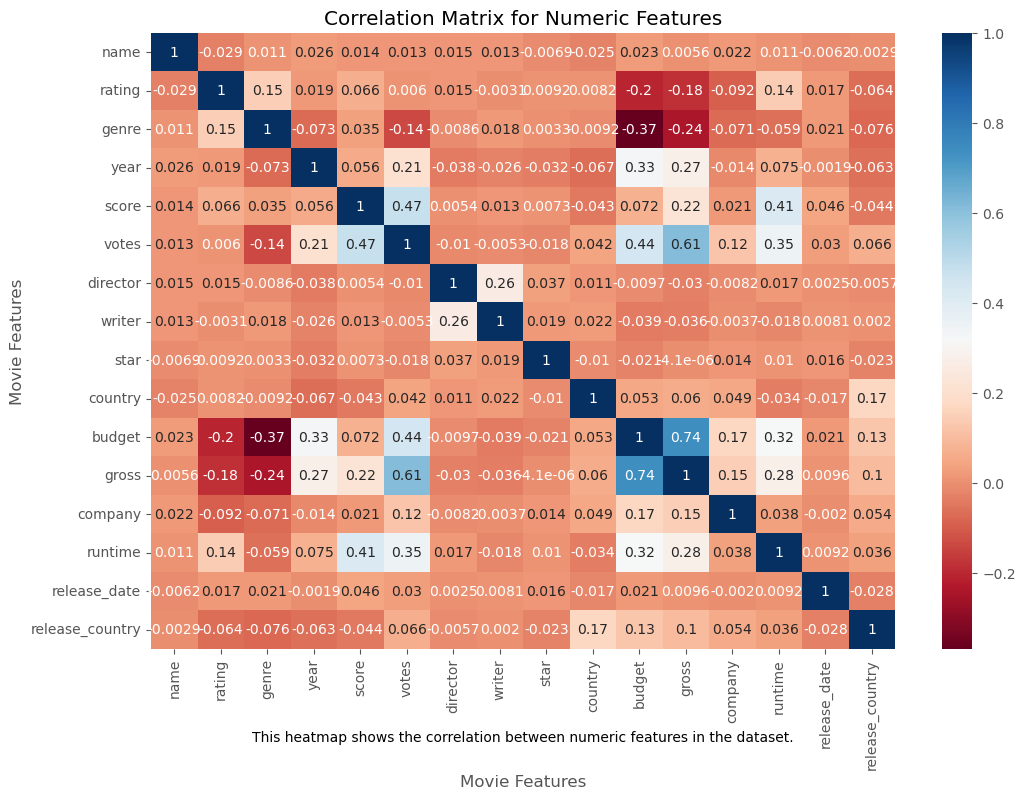

<Figure size 1200x800 with 0 Axes>

In [93]:
# Calculate the correlation with the new numeric values included
cor_numeric = df_numeric.corr(method='pearson')

# plot a heatmap
sns.heatmap(cor_numeric, annot=True, cmap='RdBu') # Use 'RdBu_r' for reverse color scale, use 'RdYlGn' for red, yellow, green

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
caption = "This heatmap shows the correlation between numeric features in the dataset."
plt.annotate(caption, xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)

plt.show()

# save it
plt.savefig('cor_heatmap_2.png', bbox_inches='tight')

In [94]:
# run the grid from earlier but with the new numeric values included
df_numeric.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.006155,-0.002908
rating,-0.029234,1.000000,0.147796,0.019499,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.017349,-0.063883
genre,0.010996,0.147796,1.000000,-0.073167,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.021321,-0.075552
year,0.025542,0.019499,-0.073167,1.000000,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,-0.001888,-0.062768
score,0.014450,0.065983,0.035106,0.056386,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.046091,-0.043528
votes,0.012615,0.006031,-0.135990,0.206021,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.029593,0.066105
director,0.015246,0.014656,-0.008553,-0.038354,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,0.002481,-0.005705
writer,0.012880,-0.003149,0.017578,-0.025908,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.008145,0.001983
star,-0.006882,0.009196,0.003341,-0.032157,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.015558,-0.023346
country,-0.025490,0.008230,-0.009164,-0.066748,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.017043,0.167894


In [97]:
# unstack

cor_mat = df_numeric.corr()

cor_pairs = cor_mat.unstack()

# sort
cor_pairs_sorted = cor_pairs.sort_values()

# filter the data by >0.5
high_cor = cor_pairs_sorted[(cor_pairs_sorted) > 0.5]

high_cor

gross            votes              0.614751
votes            gross              0.614751
budget           gross              0.740247
gross            budget             0.740247
name             name               1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
release_date     release_date       1.000000
release_country  release_country    1.000000
dtype: float64

We can see that company name actually has a fairly low correlation with the budget but we have confirmed that budget and gross are fairly highly correlated.

We also discovered that Votes and Gross were an additional highly correlated pairing, which makes sense as the amount of money made on a movie would liekly lead to it receiving higher votes.